In [607]:
#Libraries Used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
import calendar
from pandas.tseries.offsets import MonthEnd

In [608]:
#Main Data set for state wise and date wise coronavirus cases details
covid = pd.read_csv('covid_19_india.csv')
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [609]:
covid.columns

# Aggregate Results of Confirmed Cases,Cured,Deaths By State,Month

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [610]:
covid[['Confirmed','Date']]

,Confirmed,Date
0,1,30/01/20
1,1,31/01/20
2,2,01/02/20
3,3,02/02/20
4,3,03/02/20
...,...,...
3886,1704,08/07/20
3887,3230,08/07/20
3888,29968,08/07/20
3889,23837,08/07/20


In [611]:
covid['Datetime'] = covid.Date.apply(lambda x: pd.to_datetime(x).strftime('%d/%m/%Y'))
covid['Datetime'] = covid['Datetime'].astype('datetime64[ns]') 


In [612]:
#covid['Datetime'] = covid['Date'].apply(lambda x: x.replace('/20','/2020'))
#covid['Datetime'] = covid['Date'].astype('datetime64[ns]',) 


covid['Month'] = covid['Datetime'].dt.month.apply(lambda x: calendar.month_abbr[x])
covid['Week'] = covid['Datetime'].dt.weekofyear


cats = ['Jan','Feb','Mar','Apr','May','Jun',
        'Jul','Aug','Sep','Oct','Nov','Dec']


covid['Month'] = pd.Categorical(covid['Month'],cats)

covid.sort_values('Month')

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Datetime,Month,Week
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1,2020-01-30,Jan,5
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1,2020-01-31,Jan,5
30,31,29/02/20,6:00 PM,Kerala,3,0,0,0,3,2020-02-29,Feb,9
28,29,27/02/20,6:00 PM,Kerala,3,0,0,0,3,2020-02-27,Feb,9
27,28,26/02/20,6:00 PM,Kerala,3,0,0,0,3,2020-02-26,Feb,9
...,...,...,...,...,...,...,...,...,...,...,...,...
3695,3696,03/07/20,8:00 AM,Manipur,-,-,617,0,1279,2020-07-03,Jul,27
3694,3695,03/07/20,8:00 AM,Maharashtra,-,-,101172,8178,186626,2020-07-03,Jul,27
3693,3694,03/07/20,8:00 AM,Madhya Pradesh,-,-,10815,589,14106,2020-07-03,Jul,27
3745,3746,04/07/20,8:00 AM,West Bengal,-,-,13571,717,20488,2020-07-04,Jul,27


In [653]:
covid['MaxDate'] = covid.groupby('Month').Datetime.transform('last')

In [657]:
monthly_data = covid[covid['Datetime'] == covid['MaxDate']]

In [679]:
monthly_data

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Datetime,Month,Week,MaxDate
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1,2020-01-31,Jan,5,2020-01-31
30,31,29/02/20,6:00 PM,Kerala,3,0,0,0,3,2020-02-29,Feb,9,2020-02-29
501,502,31/03/20,8:30 PM,Andhra Pradesh,-,-,1,0,40,2020-03-31,Mar,14,2020-03-31
502,503,31/03/20,8:30 PM,Andaman and Nicobar Islands,-,-,0,0,10,2020-03-31,Mar,14,2020-03-31
503,504,31/03/20,8:30 PM,Bihar,-,-,0,1,15,2020-03-31,Mar,14,2020-03-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3886,3887,08/07/20,8:00 AM,Tripura,-,-,1248,1,1704,2020-07-08,Jul,28,2020-07-08
3887,3888,08/07/20,8:00 AM,Uttarakhand,-,-,2621,43,3230,2020-07-08,Jul,28,2020-07-08
3888,3889,08/07/20,8:00 AM,Uttar Pradesh,-,-,19627,827,29968,2020-07-08,Jul,28,2020-07-08
3889,3890,08/07/20,8:00 AM,West Bengal,-,-,15790,804,23837,2020-07-08,Jul,28,2020-07-08


In [684]:
daily_total = covid[~covid['State/UnionTerritory'].isin(['Cases being reassigned to states','Unassigned'])]

In [685]:
daily_total =daily_total.groupby('Datetime',as_index=False)['Confirmed'].sum()

In [686]:
daily_total['Daily cases'] = daily_total['Confirmed']-daily_total['Confirmed'].shift()

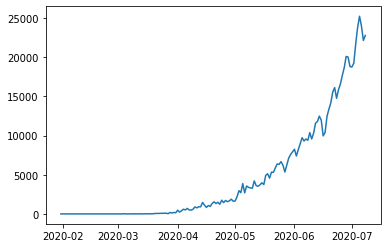

In [687]:
plt.plot(daily_total['Datetime'],daily_total['Daily cases'])
plt.show()

In [670]:
state_wise = monthly_data.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].sum()
state_wise.reset_index(inplace=True)

top_state = state_wise.sort_values('Confirmed',ascending=False).head(5)
top_state.set_index('State/UnionTerritory').plot(kind='barh')

C:\Users\Harpreet.Singh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


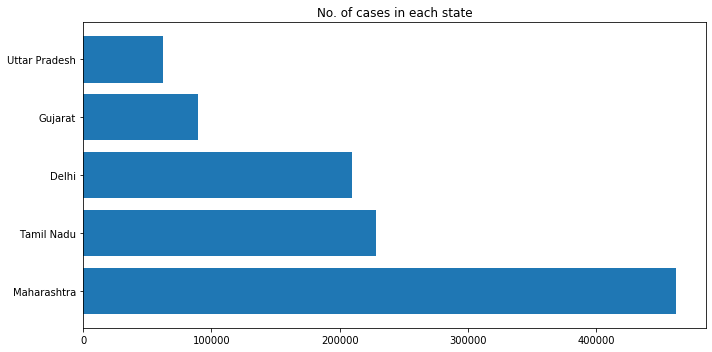

In [674]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(y='State/UnionTerritory',width='Confirmed',data=top_state)
plt.title('No. of cases in each state')
#plt.legend(loc='upper left')
#for i, v in enumerate('Confirmed'):
#    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
fig.tight_layout()

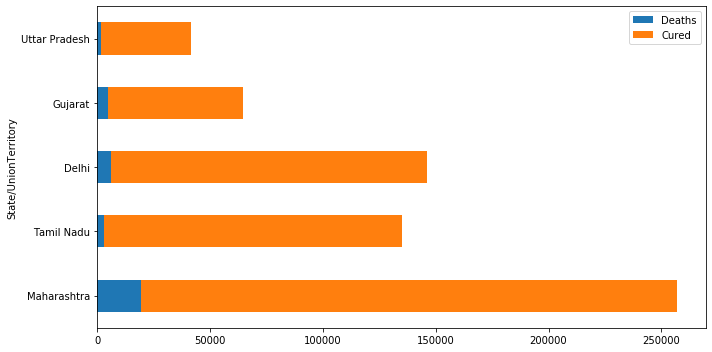

In [675]:
fig, ax = plt.subplots(figsize=(10, 5))
#ax.barh(y='State/UnionTerritory',width=['Deaths','Recovered'],data=top_state)
top_state.plot(x='State/UnionTerritory',y=['Deaths','Cured'],kind='barh',stacked=True,ax=ax)
ax.legend(loc='upper right')
fig.tight_layout()

In [569]:
state_testing = pd.read_csv('StatewiseTestingDetails.csv')
state_testing.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [570]:
state_testing.columns

#Samples tested aggregate by date, State,No. of positive cases, no. of negative cases

Index(['Date', 'State', 'TotalSamples', 'Negative', 'Positive'], dtype='object')

In [571]:
state_testing['Datetime'] = state_testing['Date'].astype('datetime64[ns]') 

In [572]:
state_testing['Month'] = state_testing['Datetime'].dt.month.apply(lambda x: calendar.month_abbr[x])

In [573]:
state_testing

,Date,State,TotalSamples,Negative,Positive,Datetime,Month
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0,2020-04-17,Apr
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0,2020-04-24,Apr
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0,2020-04-27,Apr
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0,2020-05-01,May
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0,2020-05-16,May
...,...,...,...,...,...,...,...
2855,2020-07-03,West Bengal,519054.0,NaN,20488.0,2020-07-03,Jul
2856,2020-07-04,West Bengal,530072.0,NaN,21231.0,2020-07-04,Jul
2857,2020-07-05,West Bengal,541088.0,NaN,22126.0,2020-07-05,Jul
2858,2020-07-06,West Bengal,552007.0,NaN,22987.0,2020-07-06,Jul


In [574]:
state_testing['Month'] = pd.Categorical(state_testing['Month'],cats)
state_testing.sort_values('Datetime')

,Date,State,TotalSamples,Negative,Positive,Datetime,Month
2766,2020-04-01,West Bengal,659.0,568,37.0,2020-04-01,Apr
628,2020-04-01,Delhi,2621.0,NaN,NaN,2020-04-01,Apr
1343,2020-04-01,Kerala,7965.0,7256,265.0,2020-04-01,Apr
55,2020-04-02,Andhra Pradesh,1800.0,1175,132.0,2020-04-02,Apr
718,2020-04-02,Goa,220.0,197,5.0,2020-04-02,Apr
...,...,...,...,...,...,...,...
1795,2020-07-08,Meghalaya,22000.0,NaN,99.0,2020-07-08,Jul
1588,2020-07-08,Madhya Pradesh,437930.0,418080,16036.0,2020-07-08,Jul
1494,2020-07-08,Ladakh,14938.0,12659,1047.0,2020-07-08,Jul
1681,2020-07-08,Maharashtra,1194565.0,966881,227684.0,2020-07-08,Jul


In [575]:
#state_wise_testing = state_testing[['State','TotalSamples']][state_testing['Datetime']==state_testing['Datetime'].max()]
state_wise_testing = state_testing.groupby('State',as_index=False)['TotalSamples'].max()
state_wise_testing.reset_index(inplace=True)

state_wise_testing = state_wise_testing.drop('index',axis=1)

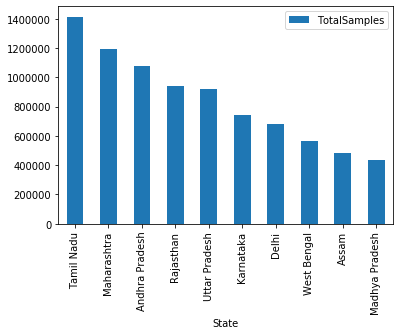

In [577]:
top_state_testing = state_wise_testing.sort_values('TotalSamples',ascending=False).head(10)
top_state_testing.set_index('State').plot(kind='bar')

In [578]:
state_level_data = pd.merge(state_wise_testing,state_wise,left_on='State',right_on='State/UnionTerritory')

In [583]:
corr=state_level_data[['TotalSamples','Confirmed']].corr()
corr

,TotalSamples,Confirmed
TotalSamples,1.000000,0.724177
Confirmed,0.724177,1.000000


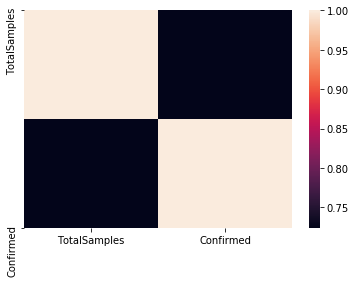

In [582]:
sns.heatmap(corr)

In [322]:
beds = pd.read_csv('HospitalBedsIndia.csv')
beds.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936


In [323]:
beds.columns
#Count of beds per state per month 
#Divide by rural vs urban for each state

Index(['Sno', 'State/UT', 'NumPrimaryHealthCenters_HMIS',
       'NumCommunityHealthCenters_HMIS', 'NumSubDistrictHospitals_HMIS',
       'NumDistrictHospitals_HMIS', 'TotalPublicHealthFacilities_HMIS',
       'NumPublicBeds_HMIS', 'NumRuralHospitals_NHP18', 'NumRuralBeds_NHP18',
       'NumUrbanHospitals_NHP18', 'NumUrbanBeds_NHP18'],
      dtype='object')

In [584]:
individual = pd.read_csv('IndividualDetails.csv')
individual.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [ ]:
individual.columns

#Count by State,Age,Gender,City,State,Status,Recovery time(status_Change-diagnosed date)
#Recovery by age,gender.state

In [ ]:
age_group = pd.read_csv('AgeGroupDetails.csv')
age_group.head()

#Use this to create data from other files i.e create Age Groups

In [ ]:
india_population = pd.read_csv('population_india_census2011.csv')
india_population.head()

In [ ]:
icmr = pd.read_csv('ICMRTestingLabs.csv')
icmr.head()
#Calculate no. of testing facilities

In [ ]:
#After individual aggregation has been done, Try to combine the data on basis State,Age Group etc and try to find more insights.
# Do in depth EDA for each file
# Try to do build a model predicting cases
#Compare with US data